In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from mlxtend.plotting import plot_decision_regions

In [2]:
## Load the penguins dataset and drop instances with missing values
penguins = pd.read_csv('penguins.csv').dropna()

# Display first five rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
# Create integer-valued species
penguins['species_int'] = penguins['species'].replace(to_replace = ['Adelie','Chinstrap', 'Gentoo'],
                                                      value = [int(0), int(1), int(2)])

# Calculate the number of penguins in each species
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_int
species,,,,,,,
Adelie,146,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119,119


In [5]:
# Define input features and output features
X = penguins[['bill_length_mm']]
y = penguins[['species_int']]

In [6]:
# Initialize a Gaussian naive Bayes model
NBModel = GaussianNB()

# Fit the model
NBModel.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
NBModel.predict(X)

# Calculate the proportion of instances correctly classified
NBModel.score(X, np.ravel(y))

0.7537537537537538

In [7]:
NBModel.predict_proba(X)[0:10]

array([[9.78859220e-01, 4.91993376e-03, 1.62208463e-02],
       [9.69590431e-01, 7.08464965e-03, 2.33249196e-02],
       [9.36817571e-01, 1.48251965e-02, 4.83572327e-02],
       [9.97366753e-01, 6.30348536e-04, 2.00289865e-03],
       [9.74654038e-01, 5.90054288e-03, 1.94454193e-02],
       [9.82351163e-01, 4.10761212e-03, 1.35412245e-02],
       [9.76854261e-01, 5.38715243e-03, 1.77585864e-02],
       [8.70427345e-01, 3.08227267e-02, 9.87499282e-02],
       [9.86511973e-01, 3.14204167e-03, 1.03459855e-02],
       [9.99490958e-01, 1.30986706e-04, 3.78055437e-04]])

/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Probability of each species')

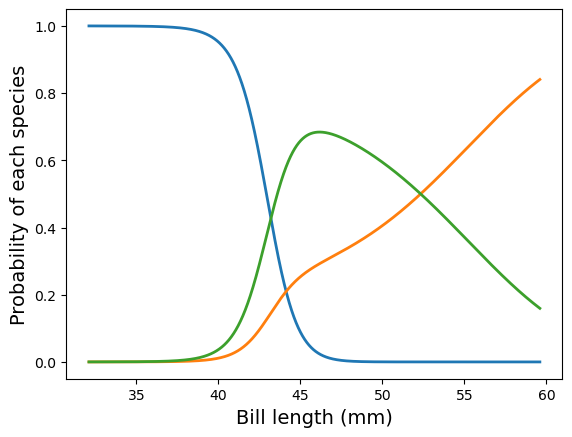

In [8]:
# Plot Gaussian naive Bayes model
xrange = np.linspace(X.min(), X.max(), 10000)
yhat = NBModel.predict(X).reshape(-1, 1).astype(int)
probAdelie = NBModel.predict_proba(xrange.reshape(-1, 1))[:, 0]
probChinstrap = NBModel.predict_proba(xrange.reshape(-1, 1))[:, 1]
probGentoo = NBModel.predict_proba(xrange.reshape(-1, 1))[:, 2]

plt.plot(xrange, probAdelie, color='#1f77b4', linewidth=2)
plt.plot(xrange, probChinstrap, color='#ff7f0e', linewidth=2)
plt.plot(xrange, probGentoo, color='#3ca02c', linewidth=2)

plt.xlabel('Bill length (mm)', fontsize=14)
plt.ylabel('Probability of each species', fontsize=14)

In [9]:
# Use additional input features
X = penguins[['bill_length_mm', 'bill_depth_mm']]
y = penguins[['species_int']]

In [10]:
# Initialize a Gaussian naive Bayes model
NBModel = GaussianNB()

# Fit the model
NBModel.fit(X, np.ravel(y))

# Calculate the predictions for each instance in X
NBModel.predict(X)

# Calculate the proportion of instances correctly classified
NBModel.score(X, np.ravel(y))

0.9309309309309309

/nix/store/msas3yllgpa9cv1srn6gxry7ygra9hwm-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


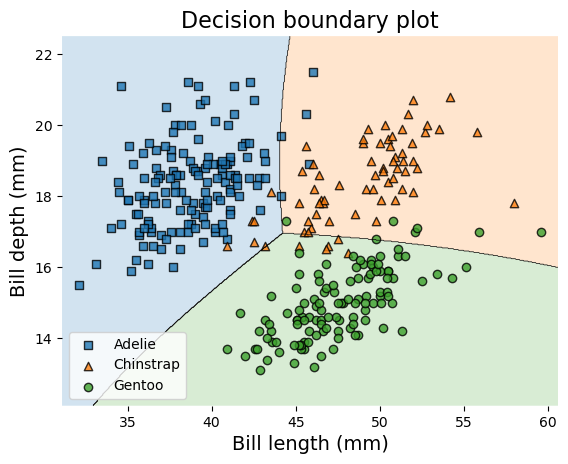

In [10]:
# Decision boundary plot with two input features
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y),
                          clf=NBModel, contourf_kwargs=contourf_kwargs)

# Add title and axis labels
p.set_title('Decision boundary plot', fontsize=16)
p.set_xlabel('Bill length (mm)', fontsize=14)
p.set_ylabel('Bill depth (mm)', fontsize=14)

# Add legend
L = plt.legend()
L.get_texts()[0].set_text('Adelie')
L.get_texts()[1].set_text('Chinstrap')
L.get_texts()[2].set_text('Gentoo')